# Sudoku solving Project

In [121]:
#import all library for computer vision
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import SudokuSolver

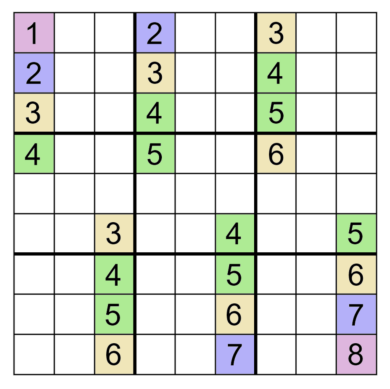

In [122]:
#read image
sample_path = "Sudoku 02.png"
image = cv.imread(sample_path)
plt.imshow(image)
plt.axis('off')
plt.show()

In [123]:
#Get shape of the image
image.shape

(639, 640, 3)

In [124]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

Certainly! Let's break down the statement os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3':

os.environ: This is a dictionary-like object provided by the os module in Python. It represents the environment variables of the current system.

['TF_CPP_MIN_LOG_LEVEL']: This is a key in the os.environ dictionary. It represents an environment variable named TF_CPP_MIN_LOG_LEVEL.

= '3': This assigns the value '3' to the environment variable TF_CPP_MIN_LOG_LEVEL.

So, putting it all together:

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3': This line of code sets the environment variable TF_CPP_MIN_LOG_LEVEL to '3'.
Now, let's discuss what TF_CPP_MIN_LOG_LEVEL does in the context of TensorFlow:

TensorFlow uses this environment variable to control the verbosity of its log messages. Here's what each value of TF_CPP_MIN_LOG_LEVEL corresponds to:

0: Shows all logs (default behavior).
1: Shows only INFO logs.
2: Shows only WARNING logs.
3: Shows only ERROR logs.
4:
 Disables all logs.
Setting TF_CPP_MIN_LOG_LEVEL to '3' instructs TensorFlow to only output error messages, suppressing all other logging messages. This can be useful in situations where you only want to see critical error messages and don't want to clutter your console or logs with less important information.

# Step: - 1 Prepare the image

In [125]:
#image # If the image is not square then make it square
#then create a blank image
imageblank = np.zeros((630,1200,3), dtype = 'i')

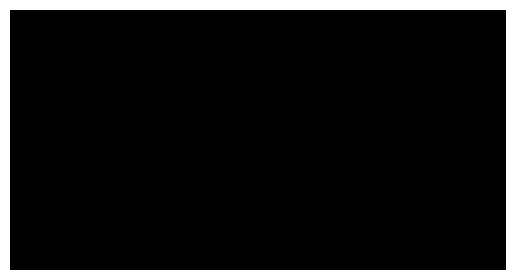

In [126]:
plt.imshow(imageblank)
plt.axis('off')
plt.show()

In [127]:
#preprocess image
def preProcess(image):
    imageGray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    imageblur = cv.GaussianBlur(imageGray, (5,5),1)
    a,imageThresold = cv.threshold(imageblur, 127, 255, cv.THRESH_BINARY)
    return imageThresold
preProcess(image)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [128]:
imageGray_1 = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
imageblur_1 = cv.GaussianBlur(imageGray_1, (5,5),1)
a,imageThresold_1 = cv.threshold(imageblur_1, 127, 255, cv.THRESH_BINARY)

The `preProcess` function serves the purpose of preparing an image for further processing or analysis. Preprocessing is a crucial step in many computer vision tasks to enhance the quality of images, improve feature extraction, and facilitate better performance of algorithms. Let's discuss the significance of each preprocessing step in the context of this function:

1. **Converting to Grayscale**: Many computer vision algorithms operate more efficiently on grayscale images rather than color images. Grayscale images contain only intensity information, which simplifies computations and reduces the dimensionality of the data.

2. **Applying Gaussian Blur**: Gaussian blur is a common technique used to reduce noise and small details in images. Noise and small details can negatively impact the performance of subsequent image processing algorithms, such as edge detection or object recognition. Gaussian blur helps smooth out the image while preserving important features.

3. **Thresholding**: Thresholding is used to convert a grayscale image into a binary image, where pixels are either black or white based on their intensity values. In this specific case, the thresholding operation helps to segment the image into regions of interest. Pixels with intensity values above a certain threshold are set to white (255), while pixels below the threshold are set to black (0). This can help isolate objects or features of interest in the image.

Overall, the `preProcess` function prepares the image by converting it to grayscale, reducing noise with Gaussian blur, and enhancing contrast and segmentation with thresholding. These preprocessing steps can improve the performance of subsequent computer vision algorithms, such as object detection, image segmentation, or feature extraction.

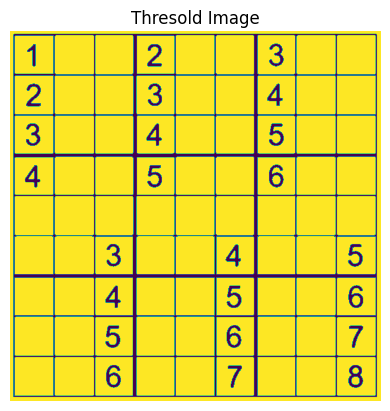

In [129]:
plt.imshow(imageThresold_1)
plt.axis('off')
plt.title('Thresold Image')
plt.show()

In [130]:
imageThresold_1.shape

(639, 640)

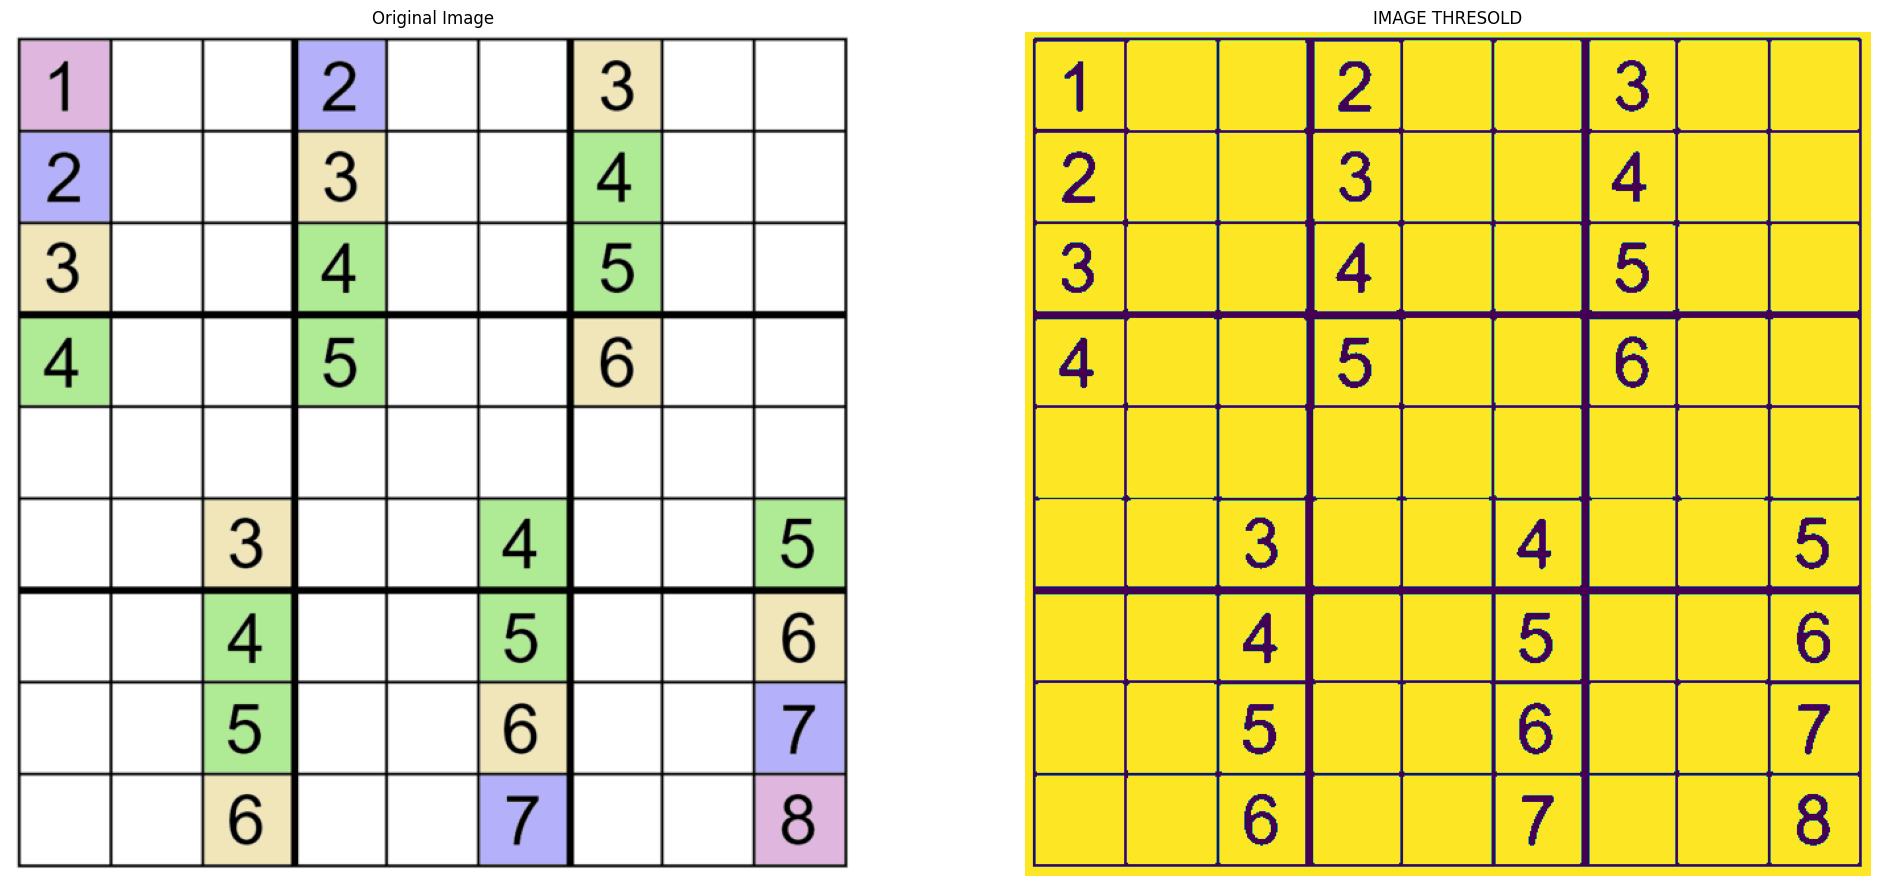

In [131]:
titles = ['Original Image', 'IMAGE THRESOLD']
images = [image, imageThresold_1]

# Plotting the images
plt.figure(figsize=(24, 20))
for i in range(len(images)):
    plt.subplot(1, 2, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.show()

# Step: - 2 Finding Countours

In [132]:
imagecontours = image.copy() #Copy the image for display purpose
imagebigcontours = image.copy() #copy the image for dispay purpose
contours, hierarchy = cv.findContours(imageThresold_1, cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
drawcontours = cv.drawContours(imagecontours, contours, -1, (255,0,0),4) #draw all detected contours

This code snippet appears to be related to image processing, likely using the OpenCV library in Python. Let's break it down step by step:

1. `imagecontours = image.copy()`: This line creates a copy of the original image (`image`) for the purpose of displaying contours. The `copy()` method is used to create a deep copy of the image, ensuring that changes made to `imagecontours` won't affect the original `image`.

2. `imagebigcontours = image.copy()`: Similarly, this line creates another copy of the original image (`image`) for the purpose of displaying contours. Again, a deep copy is made to ensure independence from the original image.

3. `contours, hierarchy = cv.findContours(imageThresold_1, cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)`: This line finds contours in a thresholded version of the image (`imageThreshold_1`). Contours are essentially outlines of objects or shapes present in the image. The `findContours` function returns two values: `contours`, which is a list of contours detected, and `hierarchy`, which provides information about the hierarchical relationships between contours (e.g., if one contour is contained within another).

4. `drawcontours = cv.drawContours(imagecontours, contours, -1, (255,0,0),4)`: This line draws the detected contours onto the copy of the original image (`imagecontours`). The `drawContours` function takes several parameters:
   - `imagecontours`: The image onto which the contours will be drawn.
   - `contours`: The list of contours to be drawn.
   - `-1`: Indicates that all contours in the list should be drawn.
   - `(255,0,0)`: The color of the drawn contours. In this case, it's blue, specified as `(B, G, R)`, where each value ranges from 0 to 255.
   - `4`: The thickness of the contour lines in pixels.

Overall, this code segment finds and draws contours of objects in the image, facilitating their visual representation or fu

The line:

```python
contours, hierarchy = cv.findContours(imageThreshold_1, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
```

Performs contour detection on the thresholded image `imageThreshold_1`. Let's break down the parameters:

- `imageThreshold_1`: This is the input image on which contour detection is performed. Typically, it's a binary image where objects are white (255) and the background is black (0). Thresholding is often used to convert a grayscale or color image into a binary image.

- `cv.RETR_EXTERNAL`: This parameter specifies the retrieval mode for the contours. In this case, `RETR_EXTERNAL` means that only the external contours (outer contours) of the objects in the image will be detected. Contours within other contours will not be detected.

- `cv.CHAIN_APPROX_SIMPLE`: This parameter specifies the contour approximation method. `CHAIN_APPROX_SIMPLE` compresses horizontal, vertical, and diagonal segments and leaves only their end points. For example, if a contour follows a straight line, only the two end points of that line will be stored. This saves memory and speeds up processing.

After executing this line, the detected contours are stored in the variable `contours`, and the hierarchical relationships between contours (if any) are stored in the variable `hierarchy`. The `hierarchy` variable is optional and is often used for more complex contour analysis, such as detecting nested contours or holes within objects.rther analysis.

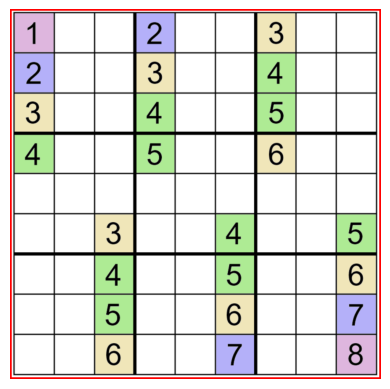

In [133]:
plt.imshow(drawcontours)
plt.axis('off')
plt.show()

In [134]:
print('Number of contours found is', len(contours))

Number of contours found is 1


# Step: - 3 Final the biggest contours and use it as sudoku.

In [135]:
def biggestContour(contours):
    biggest = np.array([])
    max_area = 0
    for i in contours:
        area = cv.contourArea(i)
        if area > 50:
            peri = cv.arcLength(i,True)
            approx = cv.approxPolyDP(i, 0.02 * peri, True)
            if area > max_area and len(approx) == 4:
                biggest = approx
                max_area = area
    return biggest, max_area

Sure, let's break down the code step by step:

1. `def biggestContour(contours):`:
   - This line defines a function named `biggestContour` that takes a single argument `contours`, which is assumed to be a list of contours detected in an image.

2. `biggest = np.array([])`:
   - This line initializes an empty NumPy array named `biggest`. This array is intended to store the points of the largest contour found in the image.

3. `max_area = 0`:
   - This line initializes a variable named `max_area` with a value of 0. This variable will be used to keep track of the maximum area found among the contours.

4. `for i in contours:`:
   - This line starts a loop that iterates over each contour in the `contours` list.

5. `area = cv.contourArea(i)`:
   - This line calculates the area of the current contour `i` using the `cv.contourArea()` function from the OpenCV library. The area is then stored in the variable `area`.

6. `if area > 50:`:
   - This line checks if the area of the current contour is greater than 50. This is likely used as a threshold to filter out small contours that are not significant.

7. `peri = cv.arcLength(i, True)`:
   - This line calculates the perimeter of the current contour `i` using the `cv.arcLength()` function from OpenCV. The parameter `True` indicates that the contour is closed.

8. `approx = cv.approxPolyDP(i, 0.02 * peri, True)`:
   - This line approximates the current contour `i` to a simpler polygon using the Douglas-Peucker algorithm. The `cv.approxPolyDP()` function takes three parameters:
     - The contour to be approximated (`i`).
     - The epsilon parameter, which determines the approximation accuracy. Here, it's set to `0.02 * peri`.
     - The `True` parameter indicates that the contour is closed.

9. `if area > max_area and len(approx) == 4:`:
   - This line checks if the area of the current contour is greater than the previously recorded maximum area (`max_area`) and if the length of the approximation `approx` is 4, which typically indicates a quadrilateral shape.

10. `biggest = approx`:
    - If the above condition is satisfied, it updates the `biggest` variable to store the current contour approximation.

11. `max_area = area`:
    - It updates the `max_area` variable with the area of the current contour, as it's the largest found so far.

12. `return biggest, max_area`:
    - Finally, this line returns the `biggest` contour (in terms of its approximation) and its corresponding `max_area` to the caller.

Overall, this function takes a list of contours as input, filters out small contours, approximates each contour to a simpler polygon, and returns the largest contour with a quadrilateral shape and its area.

In [136]:
def reorder(mypoints):
    mypoints = mypoints.reshape((4,2))
    mypointsnew = np.zeros((4,1,2), dtype = np.int32)
    add = mypoints.sum(1)
    mypointsnew[0] = mypoints[np.argmin(add)]
    mypointsnew[3] = mypoints[np.argmax(add)]
    diff = np.diff(mypoints, axis = 1)
    mypointsnew[1] = mypoints[np.argmin(diff)]
    mypointsnew[2] = mypoints[np.argmax(diff)]
    return mypointsnew

This function `reorder(mypoints)` is designed to reorder a set of four points representing the corners of a quadrilateral in a specific order. Here's a breakdown of each step:
1. `mypoints = mypoints.reshape((4,2))`:
   - Reshapes the input `mypoints` array into a 4x2 array, assuming it contains 4 sets of points, each with 2 coordinates.
2. `mypointsnew = np.zeros((4,1,2), dtype = np.int32)`:
   - Initializes a new NumPy array `mypointsnew` with shape (4,1,2) to store the reordered points.
3. `add = mypoints.sum(1)`:
   - Sums the coordinates of each point along the second axis (axis=1) of the `mypoints` array and stores the result in `add`. This represents the sum of x and y coordinates for each point.
4. `mypointsnew[0] = mypoints[np.argmin(add)]`:
   - Finds the index of the point with the minimum sum of coordinates (`argmin(add)`) and assigns it as the first point in `mypointsnew`.
5. `mypointsnew[3] = mypoints[np.argmax(add)]`:
   - Finds the index of the point with the maximum sum of coordinates (`argmax(add)`) and assigns it as the last point in `mypointsnew`.
6. `diff = np.diff(mypoints, axis = 1)`:
   - Calculates the differences between the x and y coordinates of each point along the second axis (axis=1) of the `mypoints` array and stores the result in `diff`.
7. `mypointsnew[1] = mypoints[np.argmin(diff)]`:
   - Finds the index of the point with the minimum difference between its x and y coordinates (`argmin(diff)`) and assigns it as the second point in `mypointsnew`.
8. `mypointsnew[2] = mypoints[np.argmax(diff)]`:
   - Finds the index of the point with the maximum difference between its x and y coordinates (`argmax(diff)`) and assigns it as the third point in `mypointsnew`.
9. `return mypointsnew`:
   - Returns the reordered points in `mypointsnew`.
Overall, this function ensures that the points are ordered in a specific way: starting from the top-left corner and proceeding clockwise.

In [137]:
import numpy as np
biggest, maxArea = biggestContour(contours)
print(biggest) #FIND THE BIGGEST CONTOURS
if biggest.size != 0:
    biggest = reorder(biggest)
    cv.drawContours(imagebigcontours, biggest, -1, (0,255,0), 10)
    pts1 = np.float32(biggest)
    pts2 = np.float32([[0,0],[612,0],[0,612],[612,612]])
    matrix = cv.getPerspectiveTransform(pts1, pts2)
    imagewarpcolored = cv.warpPerspective(image, matrix, (612,612))
    imagedetecteddigits = imageblank.copy()
    imagewarpcolored = cv.cvtColor(imagewarpcolored, cv.COLOR_BGR2RGB)

[[[  0   0]]

 [[  0 638]]

 [[639 638]]

 [[639   0]]]


Let's break down each step in detail:
1. Import Libraries:
   - `import numpy as np`: Imports the NumPy library, used for numerical computations and array manipulations.
2. Find the Biggest Contour:
   - `biggest, maxArea = biggestContour(contours)`: Calls the function `biggestContour()` to find the largest contour among the contours detected in the image. It returns the biggest contour (`biggest`) and its corresponding maximum area (`maxArea`).
3. Print the Biggest Contour:
   - `print(biggest)`: Prints the coordinates of the biggest contour. This step helps in visualizing the contour for debugging purposes.
4. Check if the Biggest Contour is Not Empty:
   - `if biggest.size != 0:`: Checks if the biggest contour is not empty. If the contour is empty (i.e., has size 0), further processing is skipped to avoid errors.
5. Reorder Contour Points:
   - `biggest = reorder(biggest)`: Calls the `reorder()` function to reorder the points of the biggest contour. This function ensures that the contour points are ordered in a specific manner, typically for later perspective transformation.
6. Draw Contours on Image:
   - `cv.drawContours(imagebigcontours, biggest, -1, (0,255,0), 10)`: Draws the reordered contour (`biggest`) on the image `imagebigcontours`. The contour is drawn with a green color `(0,255,0)` and a thickness of 10 pixels.
7. Define Source and Destination Points for Perspective Transformation:
   - `pts1 = np.float32(biggest)`: Converts the reordered contour points (`biggest`) to floating point format. These are the source points for the perspective transformation.
   - `pts2 = np.float32([[0,0],[612,0],[0,612],[612,612]])`: Defines the destination points for the perspective transformation. These points represent the corners of a square with sides of length 612 pixels. The transformed contour will be mapped to this square.
8. Compute Perspective Transformation Matrix:
   - `matrix = cv.getPerspectiveTransform(pts1, pts2)`: Computes the perspective transformation matrix using the source (`pts1`) and destination (`pts2`) points. This matrix describes how to transform points from the source image to the destination image.
9. Apply Perspective Transformation:
   - `imagewarpcolored = cv.warpPerspective(image, matrix, (612,612))`: Applies the perspective transformation to the original image (`image`) using the computed transformation matrix (`matrix`). The resulting image is warped to fit the defined square shape `(612, 612)`.
10. Prepare for Further Processing:
    - `imagedetecteddigits = imageblank.copy()`: Initializes a blank image (`imagedetecteddigits`) as a copy of another blank image (`imageblank`). This image may be used for further processing, such as detecting digits.
    - `imagewarpcolored = cv.cvtColor(imagewarpcolored, cv.COLOR_BGR2GRAY)`: Converts the warped color image (`imagewarpcolored`) to grayscale. This is typically done to simplify subsequent image processing tasks, such as digit detection.

Each step in this sequence contributes to the process of identifying the biggest contour, reordering its points, drawing it on the image, and preparing for further processing such as perspective transformation and digit detection.

The function `cv.getPerspectiveTransform()` in OpenCV is used to compute the perspective transformation matrix required to perform a perspective transform between two sets of points. This transformation matrix is then used with `cv.warpPerspective()` to apply the actual perspective transformation to an image.

However, `cv.getPerspectiveTransform()` itself doesn't perform any cropping or masking of the image. It simply computes the transformation matrix based on the specified source and destination points.

Once you have the transformation matrix, you can use it with `cv.warpPerspective()` to apply the perspective transformation to the entire image or to a region of interest (ROI), depending on your requirements. The destination image size parameter in `cv.warpPerspective()` determines the size of the output image after the transformation.

If you want to focus on a specific part of the image after the transformation and exclude the rest, you would need to define appropriate source and destination points that correspond to that specific region of interest. Then, when applying the perspective transformation using `cv.warpPerspective()`, you can specify the size of the output image to only include the desired region.

In summary, `cv.getPerspectiveTransform()` computes the transformation matrix, and `cv.warpPerspective()` applies the transformation to the image. You can control which parts of the image are included in the output by appropriately defining the source and destination points and specifying the output image size.

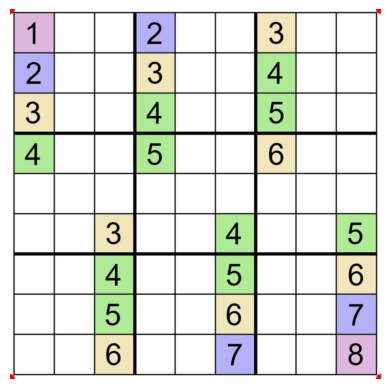

In [138]:
plt.imshow(cv.drawContours(imagebigcontours, biggest, -1, (255,0,0), 15))
plt.axis('off')
plt.show()

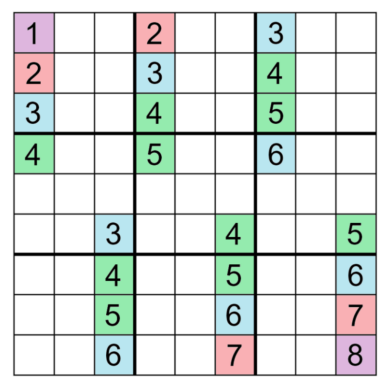

In [139]:
plt.imshow(imagewarpcolored)
plt.axis('off')
plt.show()

In [140]:
print(biggest)

[[[  0   0]]

 [[639   0]]

 [[  0 638]]

 [[639 638]]]


In [141]:
reorder(biggest)
print(biggest)

[[[  0   0]]

 [[639   0]]

 [[  0 638]]

 [[639 638]]]


# Solve sudoku from image

# Import Libraries

In [142]:
import numpy as np
import imageio
from imutils import contours
import cv2

In [143]:
src = imagewarpcolored

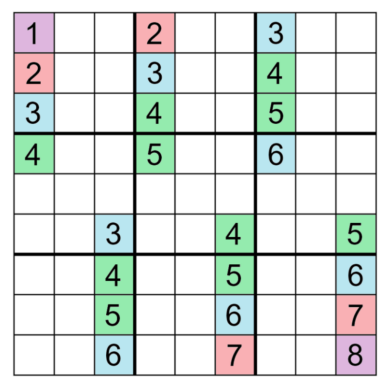

In [144]:
plt.imshow(src)
plt.axis('off')
plt.show()

In [145]:
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

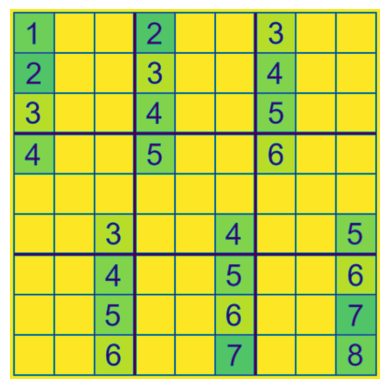

In [146]:
plt.imshow(gray)
plt.axis('off')
plt.show()

# Covert into black and white image

In [147]:
gray = cv2.bitwise_not(gray)
bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, -2)

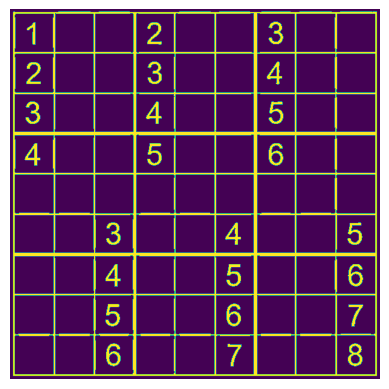

In [148]:
plt.imshow(bw)
plt.axis('off')
plt.show()

# Extract the horizontal and vertical lines

In [149]:
horizontal = np.copy(bw)
vertical = np.copy(bw)

In [150]:
horizontal.shape

(612, 612)

In [151]:
cols = horizontal.shape[1]
horizontal_size = cols // 10

In [152]:
horizontal_size

61

In [153]:
print(bw)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [154]:
horizontalstructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
horizontalstructure

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

In [155]:
horizontal = cv2.erode(horizontal, horizontalstructure)
horizontal = cv2.dilate(horizontal, horizontalstructure)

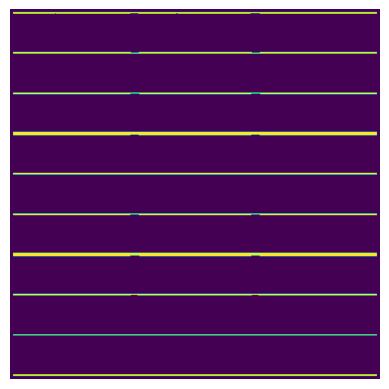

In [156]:
plt.imshow(horizontal)
plt.axis('off')
plt.show()

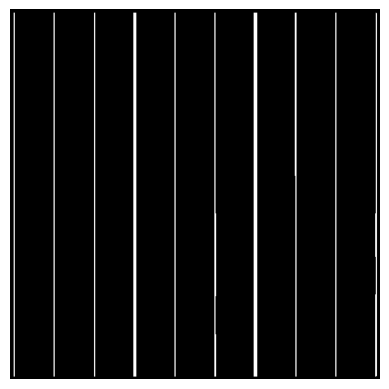

In [157]:
# Convert to grayscale
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# Threshold the image
_, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

# Define vertical structure
rows = binary.shape[0]
vertical_size = max(1, rows // 15)  # Adjust division factor
  # Adjust this as needed
verticalstructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, vertical_size))

# Apply morphological operations
eroded = cv2.erode(binary, verticalstructure)
vertical = cv2.dilate(eroded, verticalstructure)

# Display the result
plt.imshow(vertical, cmap='gray')
plt.axis('off')
plt.show()

# Concanate the horizontal and vertical lines from grid

In [158]:
new_image = cv2.bitwise_or(vertical, horizontal)

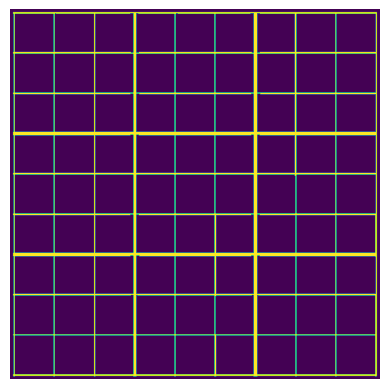

In [159]:
plt.imshow(new_image)
plt.axis('off')
plt.show()

In [160]:
new_im = cv2.bitwise_not(new_image)

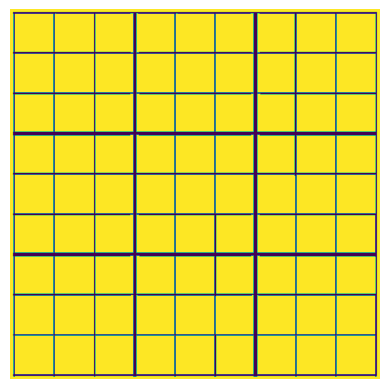

In [161]:
plt.imshow(new_im)
plt.axis('off')
plt.show()

In [162]:
edges = cv.adaptiveThreshold(new_im, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, -2)

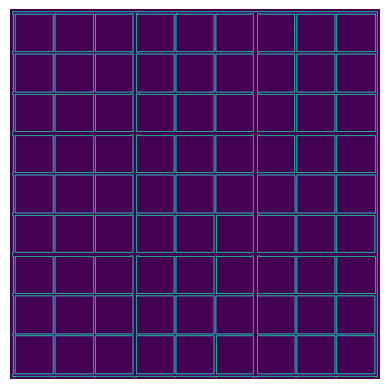

In [163]:
plt.imshow(edges)
plt.axis('off')
plt.show()

In [164]:
kernel = np.ones((2,2), np.uint8)
edges = cv2.dilate(edges, kernel)

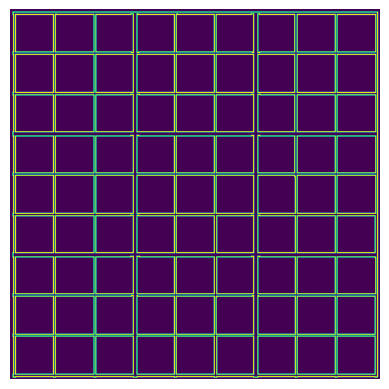

In [165]:
plt.imshow(edges)
plt.axis('off')
plt.show()

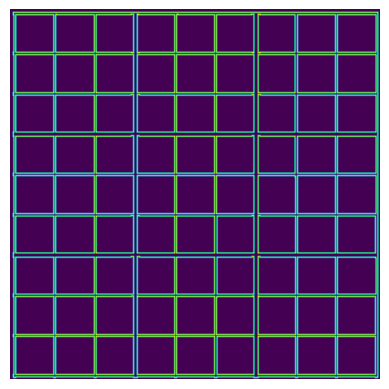

In [166]:
smooth = cv2.blur(edges, (2,2))
plt.imshow(smooth)
plt.axis('off')
plt.show()

# Find contours for detected edges

In [167]:
cnts, hierarchy = cv2.findContours(image = smooth, mode = cv2.RETR_TREE, method = cv2.CHAIN_APPROX_NONE)

In [168]:
cp = src.copy()
cv2.drawContours(image = cp, contours = cnts, contourIdx = 1, color = (0,0,255), thickness = 2, lineType = cv2.LINE_AA)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

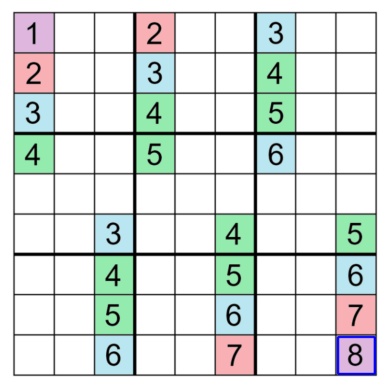

In [169]:
plt.imshow(cp)
plt.axis('off')
plt.show()

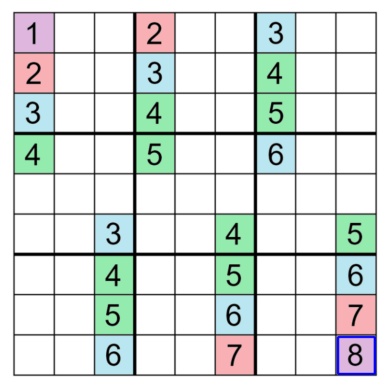

Image saved to output_image.png


In [170]:
import matplotlib.pyplot as plt

# Display the image
plt.imshow(cp)
plt.axis('off')  # Hide axes
plt.show()

# Save the image to a file
output_path = "output_image.png"
plt.imsave(output_path, cp)
print(f"Image saved to {output_path}")


In [171]:
#sort extracted contours 
cnts, _ = contours.sort_contours(cnts, method = 'left-to-right')
cnts, _ = contours.sort_contours(cnts, method = 'top-to-bottom')

# Plot the contour of each cell bounding the box

In [172]:
##### import cv2

cp = src.copy()  # Create a copy of the source image
count = 0
detected_rects = []  # List to store unique bounding boxes

# Step 1: Sort contours by their position
def sort_contours(cnts):
    # Get bounding boxes for all contours
    bounding_boxes = [cv2.boundingRect(c) for c in cnts]
    # Sort by y (row) first, then by x within each row
    sorted_indices = sorted(
        range(len(bounding_boxes)),
        key=lambda i: (bounding_boxes[i][1] // 50, bounding_boxes[i][0])  # Adjust 50 based on row spacing
    )
    return [cnts[i] for i in sorted_indices]

sorted_cnts = sort_contours(cnts)

# Step 2: Process contours and avoid duplicates
for c in sorted_cnts:
    if 1000 < cv2.contourArea(c) < 5000:  # Filter based on contour area
        rect = cv2.boundingRect(c)
        x, y, w, h = rect
        
        # Check if this box is already detected (avoid duplicates)
        is_unique = True
        for prev_x, prev_y, prev_w, prev_h in detected_rects:
            if abs(x - prev_x) < 10 and abs(y - prev_y) < 10:  # Adjust tolerance for overlap
                is_unique = False
                break
        
        if is_unique:  # Only add unique boxes
            count += 1
            detected_rects.append(rect)
            cv2.rectangle(cp, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Step 3: Display the result
    cv2.imshow('Detected Squares', cp)
    cv2.waitKey(100)


cv2.destroyAllWindows()

print(f"Total unique boxes detected: {count}")


Total unique boxes detected: 81


In [173]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Update path as needed

In [174]:
import cv2
import numpy as np
import pytesseract

# Predefined functions
def sort_contours(cnts):
    # Sort contours by y (row first), then by x (column within row)
    bounding_boxes = [cv2.boundingRect(c) for c in cnts]
    sorted_indices = sorted(
        range(len(bounding_boxes)),
        key=lambda i: (bounding_boxes[i][1] // 50, bounding_boxes[i][0])  # Adjust row height (50) as needed
    )
    return [cnts[i] for i in sorted_indices]

def get_num(img):
    return pytesseract.image_to_string(img, config=r'--oem 3 --psm 6 outputbase digits').strip()

# Initialize
cp = src.copy()  # Copy of the source image
count = 0
detected_rects = []  # List to store unique bounding boxes
unique_nums = []  # To store numbers from unique boxes

# Sort contours
sorted_cnts = sort_contours(cnts)

# Process contours
for c in sorted_cnts:
    if 1000 < cv2.contourArea(c) < 5000:  # Filter contours by area
        rect = cv2.boundingRect(c)
        x, y, w, h = rect

        # Check if this box is unique
        is_unique = True
        for prev_x, prev_y, prev_w, prev_h in detected_rects:
            if abs(x - prev_x) < 10 and abs(y - prev_y) < 10:  # Adjust tolerance as needed
                is_unique = False
                break

        if is_unique:  # Only process unique boxes
            detected_rects.append(rect)
            count += 1

            # Crop the region of interest (ROI)
            roi = cp[y:y + h, x:x + w]

            # Preprocess the ROI for OCR
            gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
            extracted_num = get_num(gray_roi)  # Extract OCR result

            # If OCR result is empty or not a digit, assign 0
            if not extracted_num.isdigit():
                extracted_num = 0
            else:
                extracted_num = int(extracted_num)

            unique_nums.append(extracted_num)

            # Draw rectangle (for visualization, optional)
            cv2.rectangle(cp, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display result
cv2.imshow('Detected Squares', cp)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Print results
print(f"Total unique boxes detected: {count}")
print("Extracted unique numbers:", unique_nums)

Total unique boxes detected: 81
Extracted unique numbers: [1, 0, 0, 2, 0, 0, 3, 0, 0, 2, 0, 0, 3, 0, 0, 4, 0, 0, 3, 0, 0, 4, 0, 0, 5, 0, 0, 4, 0, 0, 5, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 4, 0, 0, 5, 0, 0, 4, 0, 0, 5, 0, 0, 6, 0, 0, 5, 0, 0, 6, 0, 0, 7, 0, 0, 6, 0, 0, 7, 0, 0, 8]


In [175]:
# reshape the list
board_num = np.array(unique_nums).astype('uint8').reshape(9, 9)
board_num

array([[1, 0, 0, 2, 0, 0, 3, 0, 0],
       [2, 0, 0, 3, 0, 0, 4, 0, 0],
       [3, 0, 0, 4, 0, 0, 5, 0, 0],
       [4, 0, 0, 5, 0, 0, 6, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 4, 0, 0, 5],
       [0, 0, 4, 0, 0, 5, 0, 0, 6],
       [0, 0, 5, 0, 0, 6, 0, 0, 7],
       [0, 0, 6, 0, 0, 7, 0, 0, 8]], dtype=uint8)

In [178]:
import numpy as np

# Define the Sudoku grid
sudoku_board = board_num

def is_valid(board, row, col, num):
    """Check if it's valid to place the num in the given position."""
    # Check if the number is in the row
    if num in board[row]:
        return False
    
    # Check if the number is in the column
    if num in board[:, col]:
        return False
    
    # Check if the number is in the 3x3 subgrid
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    if num in board[start_row:start_row+3, start_col:start_col+3]:
        return False
    
    return True

def solve_sudoku(board):
    """Solve the Sudoku puzzle using backtracking."""
    # Find the first empty cell (value 0)
    for row in range(9):
        for col in range(9):
            if board[row, col] == 0:
                print(f"Trying to fill empty cell at ({row},{col})")
                # Try all possible numbers for this cell
                for num in range(1, 10):
                    if is_valid(board, row, col, num):
                        board[row, col] = num
                        #print(f"Placed {num} at ({row},{col})")
                        
                        # Recursively attempt to solve the rest of the board
                        if solve_sudoku(board):
                            return True
                        
                        # Backtrack if no solution is found
                        board[row, col] = 0
                        print(f"Backtracked at ({row},{col})")
                
                return False  # If no number is valid, return False
    
    return True  # If all cells are filled, puzzle is solved

# Solve the Sudoku puzzle
if solve_sudoku(sudoku_board):
    print("Sudoku solved:")
    print(sudoku_board)
else:
    print("No solution exists.")

Sudoku solved:
[[1 4 7 2 5 8 3 6 9]
 [2 5 8 3 6 9 4 7 1]
 [3 6 9 4 7 1 5 8 2]
 [4 7 1 5 8 2 6 9 3]
 [5 8 2 6 9 3 7 1 4]
 [6 9 3 7 1 4 8 2 5]
 [7 1 4 8 2 5 9 3 6]
 [8 2 5 9 3 6 1 4 7]
 [9 3 6 1 4 7 2 5 8]]


In [179]:
sudoku_board

array([[1, 4, 7, 2, 5, 8, 3, 6, 9],
       [2, 5, 8, 3, 6, 9, 4, 7, 1],
       [3, 6, 9, 4, 7, 1, 5, 8, 2],
       [4, 7, 1, 5, 8, 2, 6, 9, 3],
       [5, 8, 2, 6, 9, 3, 7, 1, 4],
       [6, 9, 3, 7, 1, 4, 8, 2, 5],
       [7, 1, 4, 8, 2, 5, 9, 3, 6],
       [8, 2, 5, 9, 3, 6, 1, 4, 7],
       [9, 3, 6, 1, 4, 7, 2, 5, 8]], dtype=uint8)

# Thank you